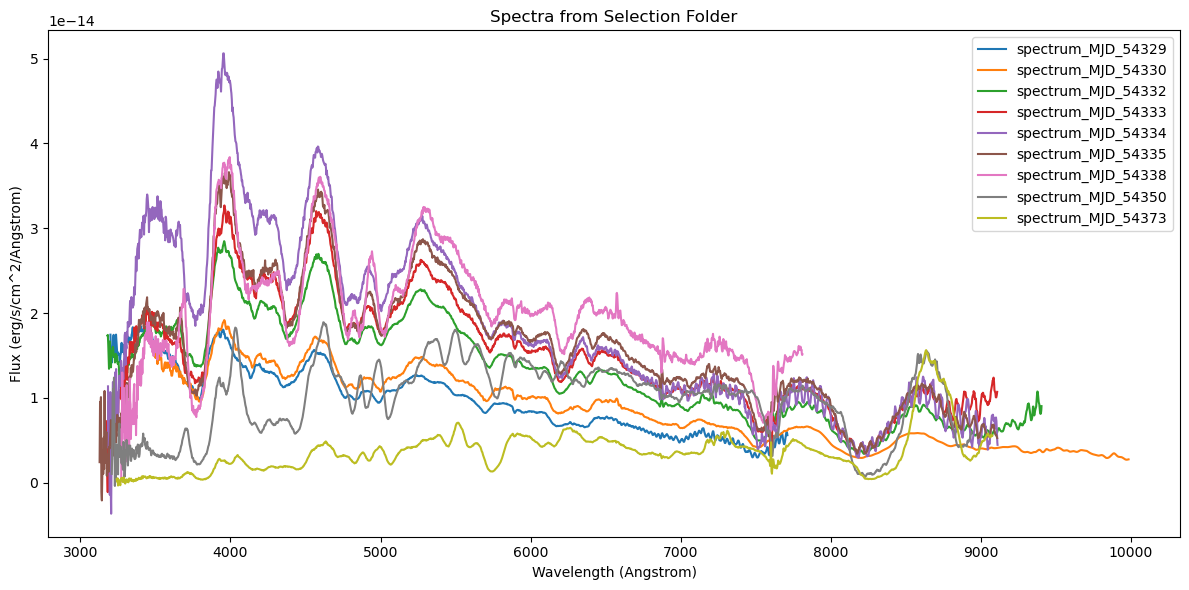

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set your directory path
folder_path = 'selection'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Plot each spectrum
plt.figure(figsize=(12, 6))
for csv_file in sorted(csv_files):
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Plotting
    plt.plot(df['Wavelength'], df['Flux'], label=csv_file.replace('.csv', ''))

plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (erg/s/cm^2/Angstrom)')
plt.title('Spectra from Selection Folder')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

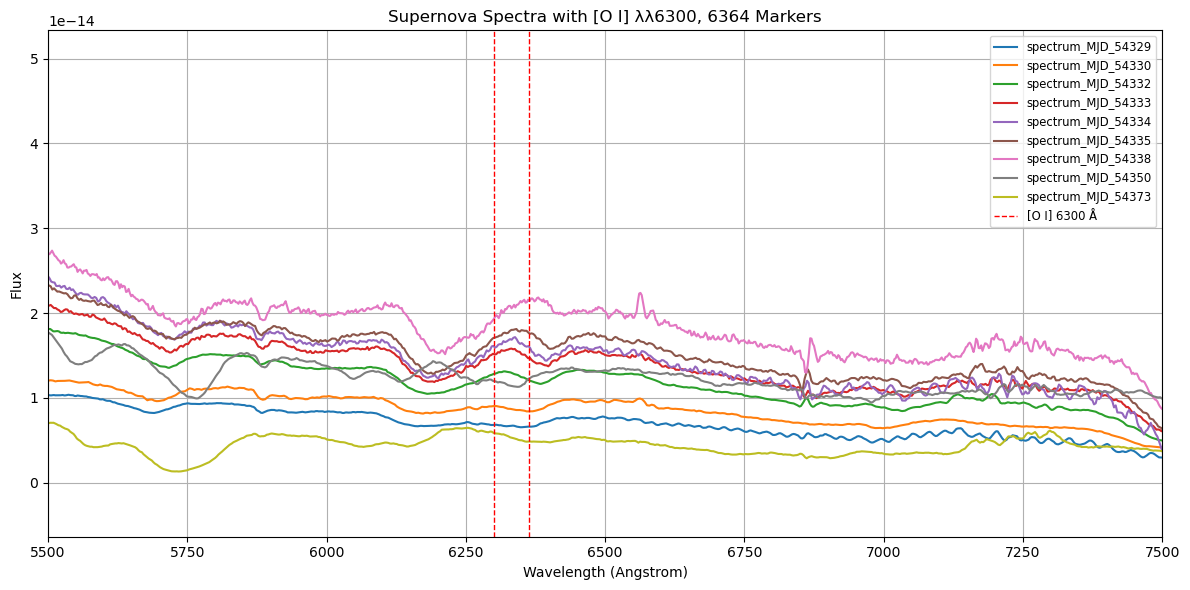

In [2]:
# Set your directory path
folder_path = 'selection'  # Replace with your actual path if needed

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# [O I] forbidden line wavelengths in Angstroms
oi_lines = [6300, 6364]

# Plot each spectrum
plt.figure(figsize=(12, 6))
for csv_file in sorted(csv_files):
    file_path = os.path.join(folder_path, csv_file)
    
    df = pd.read_csv(file_path)

    plt.plot(df['Wavelength'] / (1 + 0.001728), df['Flux'], label=csv_file.replace('.csv', '')) # Deredshifted Wavelength

# Add vertical lines for [O I] lines
for line in oi_lines:
    plt.axvline(x=line, color='red', linestyle='--', linewidth=1.0, label=f"[O I] {line} Å" if line == 6300 else None)

plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.title('Supernova Spectra with [O I] λλ6300, 6364 Markers')
plt.legend(fontsize='small', loc='upper right')
plt.grid(True)
plt.xlim(5500, 7500)
plt.tight_layout()
plt.show()

In [3]:
from astropy.time import Time

jd = 2454337.0  # example JD (B-band max in the paper)
t = Time(jd, format='jd')
mjd_b_band_max = t.mjd
# Printing the Modified Julian Date (MJD) corresponding to the given Julian Date (JD)
print(t.mjd)

54336.5


In [4]:
import re

# Path to your folder
folder_path = "selection"

# B-band max MJD from the paper
mjd_b_band_max = 54337.0

# Get all CSVs with MJD in filename
csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".csv") and "MJD" in f])

# Collect info
records = []
for fname in csv_files:
    match = re.search(r'MJD_(\d+(?:\.\d+)?)', fname)
    if match:
        mjd = float(match.group(1))
        t = Time(mjd, format='mjd')
        delta_t = mjd - mjd_b_band_max
        records.append((fname, mjd, t.iso, delta_t))

# Make and print table
df = pd.DataFrame(records, columns=["Filename", "MJD", "ISO_Date", "Days_Since_Bmax"])
print(df)

                 Filename      MJD                 ISO_Date  Days_Since_Bmax
0  spectrum_MJD_54329.csv  54329.0  2007-08-17 00:00:00.000             -8.0
1  spectrum_MJD_54330.csv  54330.0  2007-08-18 00:00:00.000             -7.0
2  spectrum_MJD_54332.csv  54332.0  2007-08-20 00:00:00.000             -5.0
3  spectrum_MJD_54333.csv  54333.0  2007-08-21 00:00:00.000             -4.0
4  spectrum_MJD_54334.csv  54334.0  2007-08-22 00:00:00.000             -3.0
5  spectrum_MJD_54335.csv  54335.0  2007-08-23 00:00:00.000             -2.0
6  spectrum_MJD_54338.csv  54338.0  2007-08-26 00:00:00.000              1.0
7  spectrum_MJD_54350.csv  54350.0  2007-09-07 00:00:00.000             13.0
8  spectrum_MJD_54373.csv  54373.0  2007-09-30 00:00:00.000             36.0


In [5]:
import re

# Path to your folder
folder_path = "Archive"

# B-band max MJD from the paper
mjd_b_band_max = 54337.0

# Get all CSVs with MJD in filename
csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".csv") and "MJD" in f])

# Collect info
records = []
for fname in csv_files:
    match = re.search(r'MJD_(\d+(?:\.\d+)?)', fname)
    if match:
        mjd = float(match.group(1))
        t = Time(mjd, format='mjd')
        delta_t = mjd - mjd_b_band_max
        records.append((fname, mjd, t.iso, delta_t))

# Make and print table
df_mjd_time_conv = pd.DataFrame(records, columns=["Filename", "MJD", "ISO_Date", "Days_Since_Bmax"])
print(df_mjd_time_conv)

                    Filename      MJD                 ISO_Date  \
0   spectrum_MJD_54328.5.csv  54328.5  2007-08-16 12:00:00.000   
1   spectrum_MJD_54329.6.csv  54329.6  2007-08-17 14:24:00.000   
2     spectrum_MJD_54329.csv  54329.0  2007-08-17 00:00:00.000   
3     spectrum_MJD_54330.csv  54330.0  2007-08-18 00:00:00.000   
4     spectrum_MJD_54332.csv  54332.0  2007-08-20 00:00:00.000   
5   spectrum_MJD_54333.5.csv  54333.5  2007-08-21 12:00:00.000   
6     spectrum_MJD_54333.csv  54333.0  2007-08-21 00:00:00.000   
7     spectrum_MJD_54334.csv  54334.0  2007-08-22 00:00:00.000   
8     spectrum_MJD_54335.csv  54335.0  2007-08-23 00:00:00.000   
9     spectrum_MJD_54338.csv  54338.0  2007-08-26 00:00:00.000   
10    spectrum_MJD_54343.csv  54343.0  2007-08-31 00:00:00.000   
11  spectrum_MJD_54345.0.csv  54345.0  2007-09-02 00:00:00.000   
12  spectrum_MJD_54346.0.csv  54346.0  2007-09-03 00:00:00.000   
13  spectrum_MJD_54347.0.csv  54347.0  2007-09-04 00:00:00.000   
14  spectr

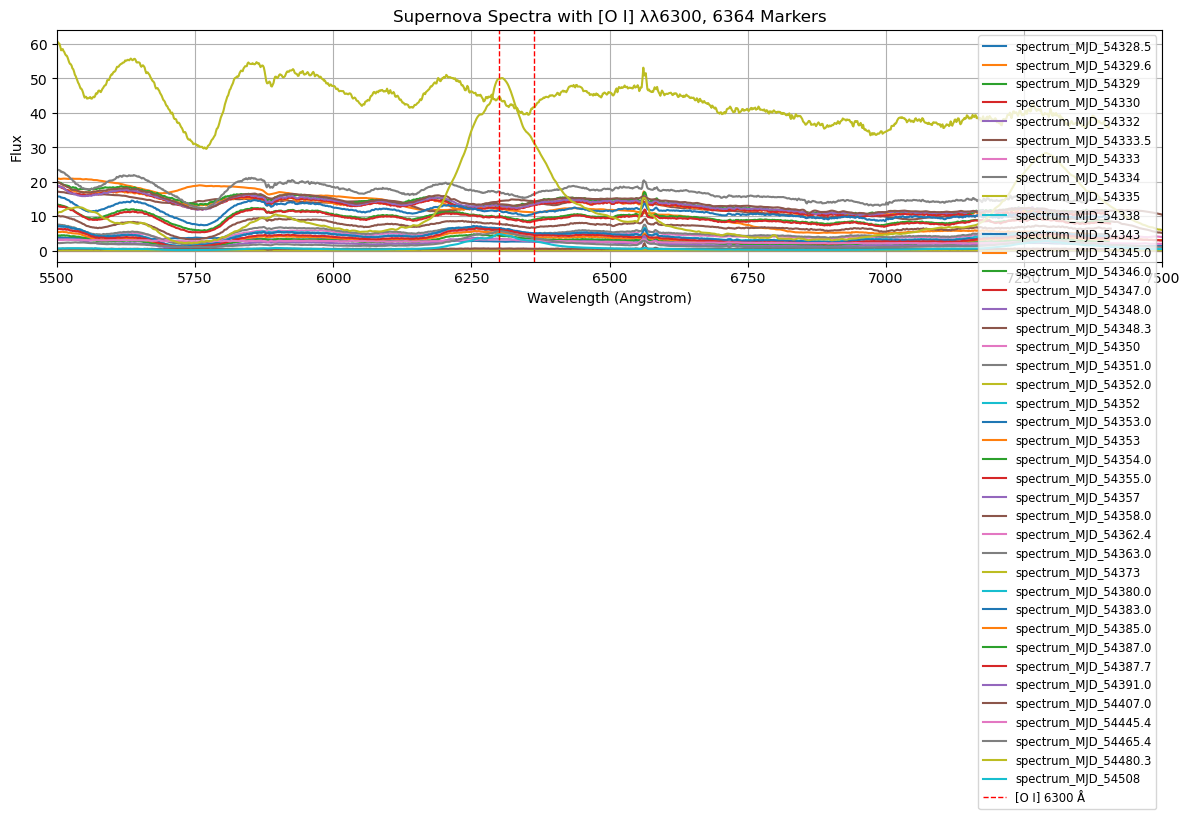

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set your directory path
folder_path = 'Archive'  # Replace with your actual path if needed

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# [O I] forbidden line wavelengths in Angstroms
oi_lines = [6300, 6364]

# Plot each spectrum
plt.figure(figsize=(12, 6))
for csv_file in sorted(csv_files):
    file_path = os.path.join(folder_path, csv_file)
    
    df = pd.read_csv(file_path)

    plt.plot(df['Wavelength'] / (1 + 0.001728), df['Flux'], label=csv_file.replace('.csv', '')) # Deredshifted Wavelength

# Add vertical lines for [O I] lines
for line in oi_lines:
    plt.axvline(x=line, color='red', linestyle='--', linewidth=1.0, label=f"[O I] {line} Å" if line == 6300 else None)

plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.title('Supernova Spectra with [O I] λλ6300, 6364 Markers')
plt.legend(fontsize='small', loc='upper right')
plt.grid(True)
plt.xlim(5500, 7500)
plt.tight_layout()
plt.show()

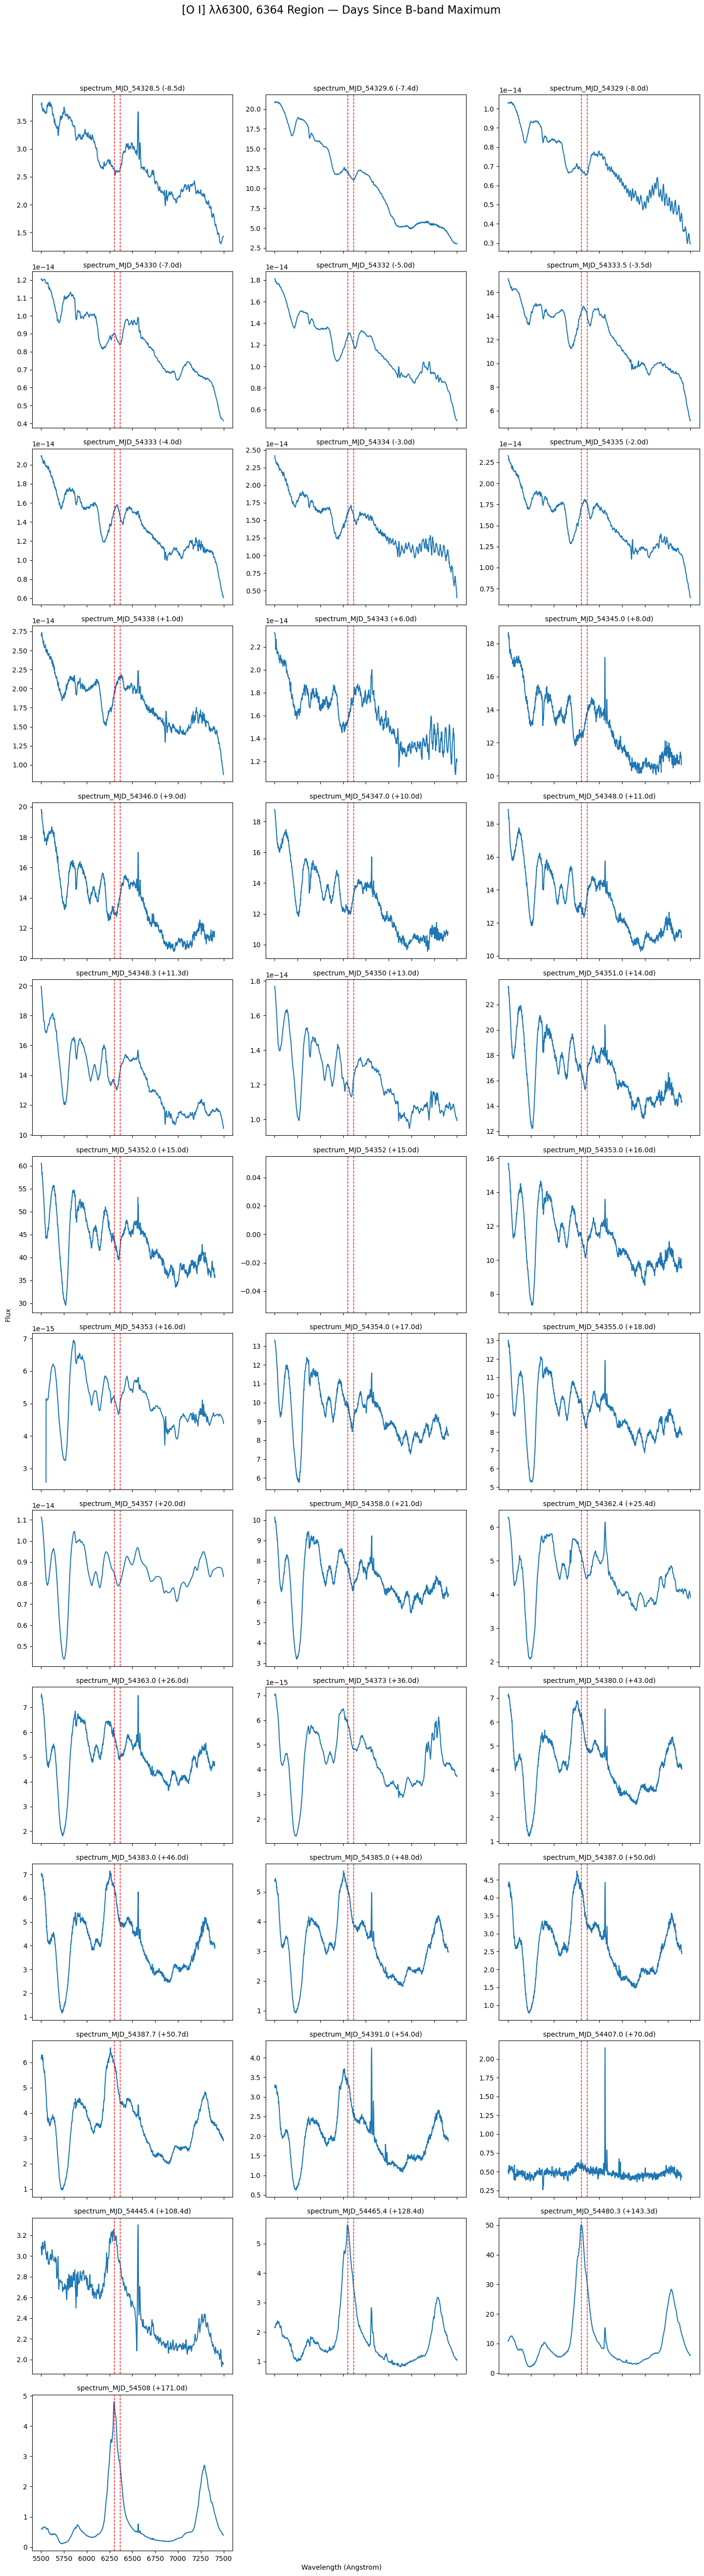

In [7]:
import math

# Parameters
folder_path = 'Archive'
oi_lines = [6300, 6364]
zoom_range = (5500, 7500)
redshift = 0.001728
n_cols = 3

# Create a lookup dictionary for filename → days_since_bmax
lookup = dict(zip(df_mjd_time_conv['Filename'], df_mjd_time_conv['Days_Since_Bmax']))

# Get list of spectrum files
csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])
n_files = len(csv_files)
n_rows = math.ceil(n_files / n_cols)

# Plot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharex=True)
axes = axes.flatten()

for i, csv_file in enumerate(csv_files):
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)

    wave_rest = df['Wavelength'] / (1 + redshift)
    flux = df['Flux']
    
    ax = axes[i]
    mask = (wave_rest >= zoom_range[0]) & (wave_rest <= zoom_range[1])
    ax.plot(wave_rest[mask], flux[mask])

    # Pull days since B-band max from lookup table
    dt = lookup.get(csv_file, '???')

    if isinstance(dt, (int, float)):
        title = f"{csv_file.replace('.csv','')} ({dt:+.1f}d)"
    else:
        title = f"{csv_file.replace('.csv','')} (???)"
    
    ax.set_title(title, fontsize=10)

    for line in oi_lines:
        ax.axvline(x=line, color='red', linestyle='--', linewidth=1.0)

# Clean up extra axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("[O I] λλ6300, 6364 Region — Days Since B-band Maximum", fontsize=16)
fig.text(0.5, 0.04, 'Wavelength (Angstrom)', ha='center')
fig.text(0.04, 0.5, 'Flux', va='center', rotation='vertical')

plt.tight_layout(rect=[0.04, 0.04, 1, 0.96])
plt.show()

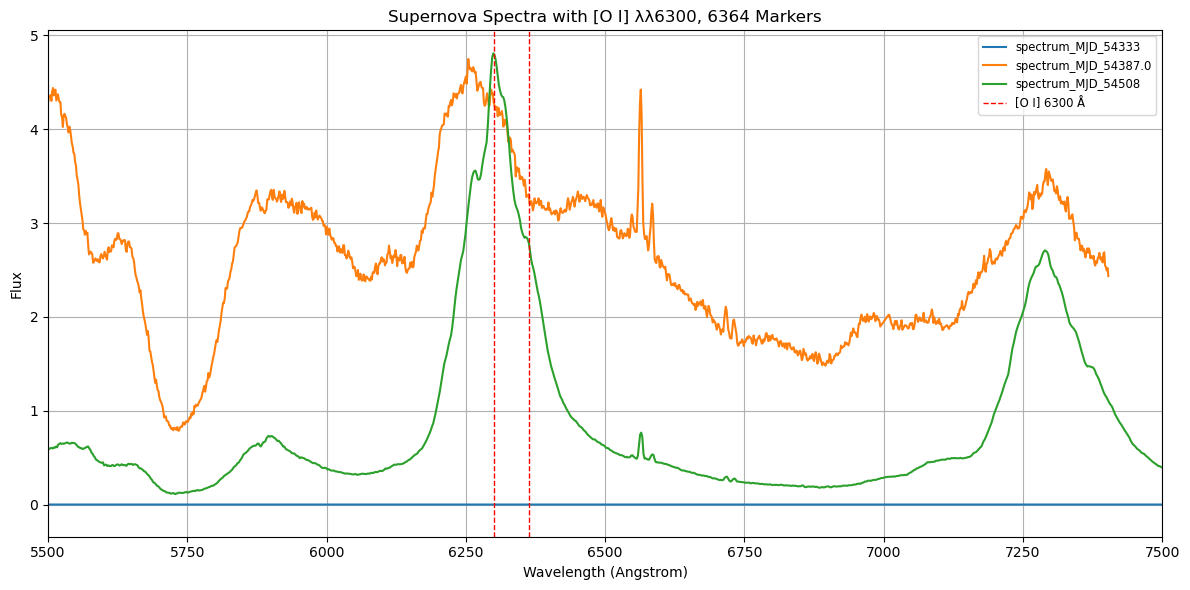

In [8]:
# Set your directory path
folder_path = 'selection_2'  # Replace with your actual path if needed

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# [O I] forbidden line wavelengths in Angstroms
oi_lines = [6300, 6364]

# Plot each spectrum
plt.figure(figsize=(12, 6))
for csv_file in sorted(csv_files):
    file_path = os.path.join(folder_path, csv_file)
    
    df = pd.read_csv(file_path)

    plt.plot(df['Wavelength'] / (1 + 0.001728), df['Flux'], label=csv_file.replace('.csv', '')) # Deredshifted Wavelength

# Add vertical lines for [O I] lines
for line in oi_lines:
    plt.axvline(x=line, color='red', linestyle='--', linewidth=1.0, label=f"[O I] {line} Å" if line == 6300 else None)

plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.title('Supernova Spectra with [O I] λλ6300, 6364 Markers')
plt.legend(fontsize='small', loc='upper right')
plt.grid(True)
plt.xlim(5500, 7500)
plt.tight_layout()
plt.show()

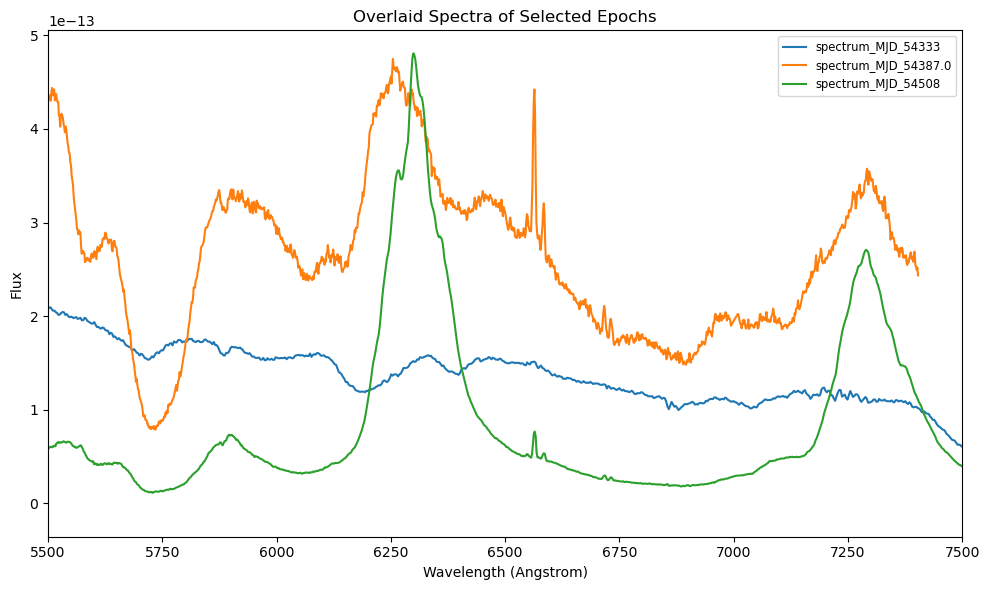

In [9]:

# Folder and files
folder_path = 'Archive'

redshift = 0.001728
oi_lines = [6300, 6364]

# Plot setup
plt.figure(figsize=(10, 6))
# Plot data from each file separately
df1 = pd.read_csv(f"{folder_path}/spectrum_MJD_54333.csv")
wave_rest1 = df1['Wavelength'] / (1 + redshift)
flux1 = df1['Flux'] *10
plt.plot(wave_rest1, flux1, label="spectrum_MJD_54333")

df2 = pd.read_csv(f"{folder_path}/spectrum_MJD_54387.0.csv")
wave_rest2 = df2['Wavelength'] / (1 + redshift)
flux2 = df2['Flux'] * 10e-14
plt.plot(wave_rest2, flux2, label="spectrum_MJD_54387.0")

df3 = pd.read_csv(f"{folder_path}/spectrum_MJD_54508.csv")
wave_rest3 = df3['Wavelength'] / (1 + redshift)
flux3 = df3['Flux'] * 10e-14
plt.plot(wave_rest3, flux3, label="spectrum_MJD_54508")

plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.title('Overlaid Spectra of Selected Epochs')
plt.legend(fontsize='small')
plt.xlim(5500, 7500)  # Focus on region of interest
plt.tight_layout()
plt.show()

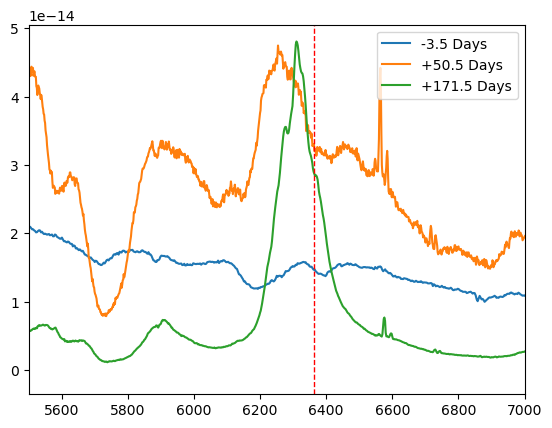

In [10]:
df_minus3_3 = pd.read_csv('selection_2_jillian/spectrum_MJD_54333.csv')
df_minus3_3_wav = df_minus3_3["Wavelength"]
df_minus3_3_flx = df_minus3_3["Flux"]

# df_plus1_5 = pd.read_csv('selection_2_jillian/spectrum_MJD_54338.csv')
# df_plus1_5_wav = df_plus1_5["Wavelength"]
# df_plus1_5_flx = df_plus1_5["Flux"]

df_plus50_5 = pd.read_csv('selection_2_jillian/spectrum_MJD_54387.0.csv')
df_plus50_5_wav = df_plus50_5["Wavelength"]
df_plus50_5_flx = df_plus50_5["Flux"]

df_plus171_5 = pd.read_csv('selection_2_jillian/spectrum_MJD_54508.csv')
df_plus171_5_wav = df_plus171_5["Wavelength"]
df_plus171_5_flx = df_plus171_5["Flux"]


plt.plot(df_minus3_3_wav, df_minus3_3_flx, label = "-3.5 Days")
# plt.plot(df_plus1_5_wav, df_plus1_5_flx, label = "+1.5 Days")
plt.plot(df_plus50_5_wav, df_plus50_5_flx, label = "+50.5 Days")
plt.plot(df_plus171_5_wav, df_plus171_5_flx, label = "+171.5 Days")
plt.legend()
plt.xlim(5500, 7000)
plt.axvline(6364, color='red', linestyle='--', linewidth=1.0, label="[O I] 6364 Å")


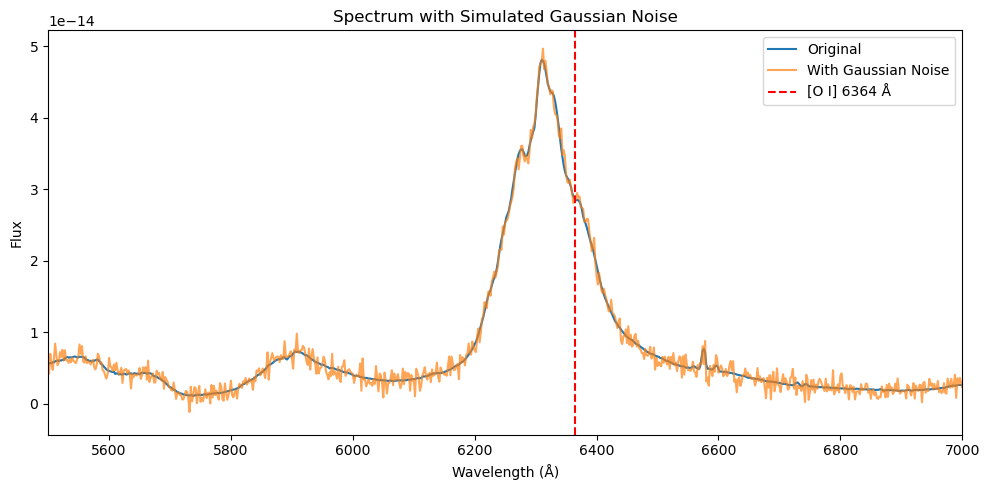

In [11]:
import numpy as np

# Load original fluxes
df = pd.read_csv('selection_2_jillian/spectrum_MJD_54508.csv')
wav = df["Wavelength"]
true_flux = df["Flux"]

# Define standard deviation of noise (e.g. 5% of median flux)
noise_std = 0.2 * true_flux.median()

# Generate Gaussian noise
noise = np.random.normal(0, noise_std, size=len(true_flux))

# Add noise to flux
noisy_flux = true_flux + noise

# Plot
plt.figure(figsize=(10, 5))
plt.plot(wav, true_flux, label="Original", alpha=1)
plt.plot(wav, noisy_flux, label="With Gaussian Noise", alpha=0.7)
plt.axvline(6364, color='red', linestyle='--', label="[O I] 6364 Å")
plt.legend()
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux")
plt.xlim(5500, 7000)
plt.title("Spectrum with Simulated Gaussian Noise")
plt.tight_layout()
plt.show()

In [19]:
 def model(wav, m, b, A, lambda0, sigma):
    continuum = m * wav + b
    gaussian = A * np.exp(-0.5 * ((wav - lambda0) / sigma)**2)
    return continuum + gaussian

def log_likelihood(theta, wav, flux, flux_err):
    m, b, A, lambda0, sigma = theta
    model_flux = model(wav, m, b, A, lambda0, sigma)
    return -0.5 * np.sum(((flux - model_flux) / flux_err) ** 2)

def log_prior(theta):
    m, b, A, lambda0, sigma = theta
    if -1 < m < 1 and 0 < A < 1e-12 and 6200 < lambda0 < 6450 and 0 < sigma < 50:
        return 0.0  # Flat prior
    return -np.inf  # log(0)

def log_posterior(theta, wav, flux, flux_err):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, wav, flux, flux_err)

import emcee

# Prepare your data (slice around the feature)
wav = df["Wavelength"].values
flux = df["Flux"].values
flux_err = np.full_like(flux, np.std(flux - np.mean(flux)))  # assume constant error for now

# Initialize walkers
ndim = 5
nwalkers = 10000
initial = np.array([0, np.median(flux), np.max(flux), 6364, 10])
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(wav, flux, flux_err))
sampler.run_mcmc(pos, 5000, progress=True)

# Flatten and discard burn-in
samples = sampler.get_chain(discard=1000, flat=True)

  0%|          | 0/5000 [00:00<?, ?it/s]/Users/pittsburghgraduatestudent/miniforge3/envs/DSFP_2/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5000/5000 [01:32<00:00, 54.06it/s]


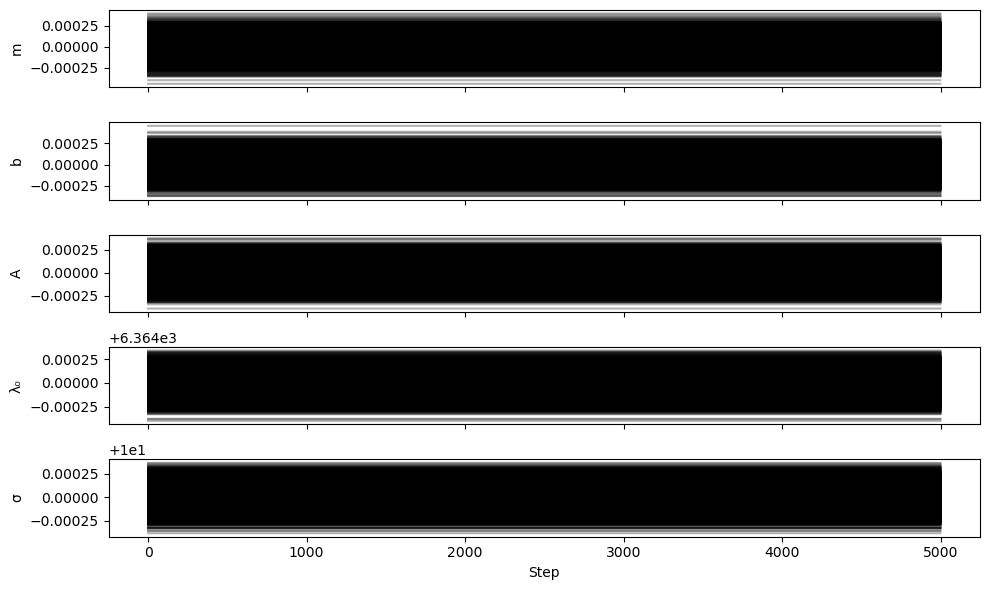

In [20]:
import matplotlib.pyplot as plt

samples_all = sampler.get_chain()
fig, axes = plt.subplots(ndim, figsize=(10, 6), sharex=True)
labels = ["m", "b", "A", "λ₀", "σ"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples_all[:, :, i], "k", alpha=0.3)
    ax.set_ylabel(labels[i])
axes[-1].set_xlabel("Step")
plt.tight_layout()
plt.show()

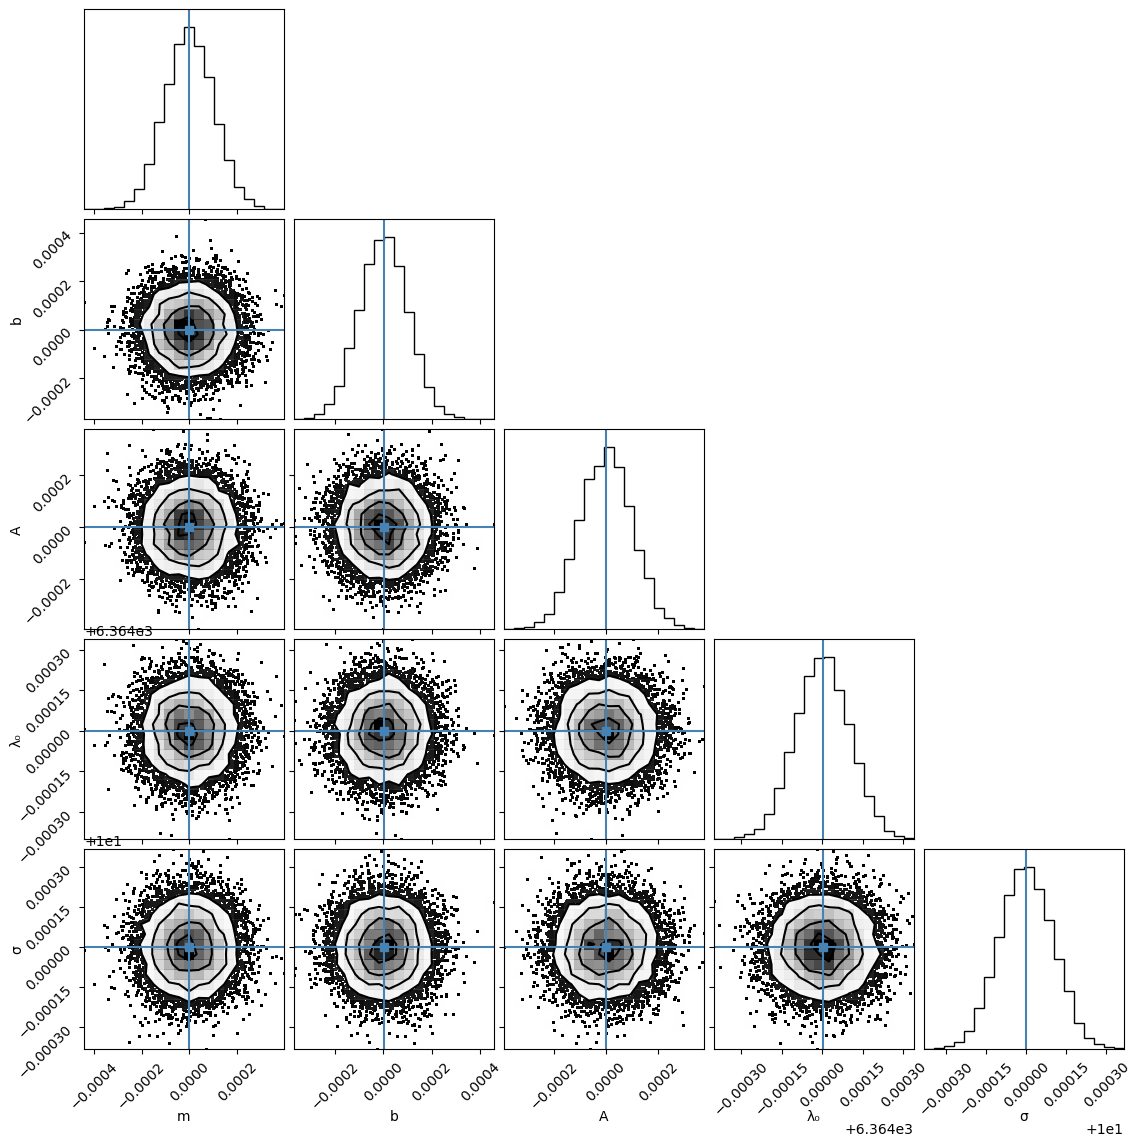

In [21]:

import corner
import matplotlib.pyplot as plt

labels = ["m", "b", "A", "λ₀", "σ"]

fig = corner.corner(samples, labels=labels, truths=np.median(samples, axis=0))
plt.show()

In [22]:
import numpy as np

for i, label in enumerate(labels):
    param_samples = samples[:, i]
    median = np.median(param_samples)
    lower = np.percentile(param_samples, 16)
    upper = np.percentile(param_samples, 84)
    print(f"{label} = {median:.4g} (+{upper - median:.2g}, -{median - lower:.2g})")

m = 1.139e-07 (+0.0001, -0.0001)
b = 9.498e-07 (+9.9e-05, -9.9e-05)
A = 1.003e-06 (+9.8e-05, -0.0001)
λ₀ = 6364 (+0.0001, -0.0001)
σ = 10 (+0.0001, -9.9e-05)


In [3]:
samples = sampler.get_chain(discard=1000, flat=True)
sigma_samples = samples[:, 4]  # assuming σ is the 5th param
fwhm_samples = 2.355 * sigma_samples

median = np.median(fwhm_samples)
lower = np.percentile(fwhm_samples, 16)
upper = np.percentile(fwhm_samples, 84)

print(f"FWHM = {median:.2f} Å (+{upper - median:.2f}, -{median - lower:.2f})")

NameError: name 'sampler' is not defined